In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
null_percentages = (df.isnull().sum() / len(df)) * 100
null_percentages

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.shape

(8807, 12)

In [8]:
df.duplicated().sum()

np.int64(0)

***
Observation:
1. need to change the data type of date_added column to DATE
2. director column has more than 10% NULL values
3. cast, country, date_added, rating, duration has less than 10% NULL Values
4. No duplicates in whole dataset
5. listed_in and description wouldn't be so usefull during analysis, so we'll drop them
***

# Data Cleaning

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
# Drop 'description' for simplicity, ignore error if column doesn't exist
df.drop(columns=['description'], inplace=True)

In [12]:
# Drop rows with critical nulls

df.dropna(subset = ['date_added', 'duration', 'rating'], inplace=True,)

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2538
cast             817
country          826
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [14]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      6164 non-null   object        
 4   cast          7885 non-null   object        
 5   country       7876 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 815.8+ KB


In [16]:
df['duration_value'] = df['duration'].astype('str').str.split(" ").str[0]
df['duration_unit'] = df['duration'].astype('str').str.split(" ").str[1]

In [17]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",1,Season


In [18]:
df.drop(columns=['duration'], inplace=True)

In [19]:
df['duration_value'] = df['duration_value'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8702 non-null   object        
 1   type            8702 non-null   object        
 2   title           8702 non-null   object        
 3   director        6164 non-null   object        
 4   cast            7885 non-null   object        
 5   country         7876 non-null   object        
 6   date_added      8702 non-null   datetime64[ns]
 7   release_year    8702 non-null   int64         
 8   rating          8702 non-null   object        
 9   listed_in       8702 non-null   object        
 10  duration_value  8702 non-null   int64         
 11  duration_unit   8702 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 883.8+ KB


# Visualization

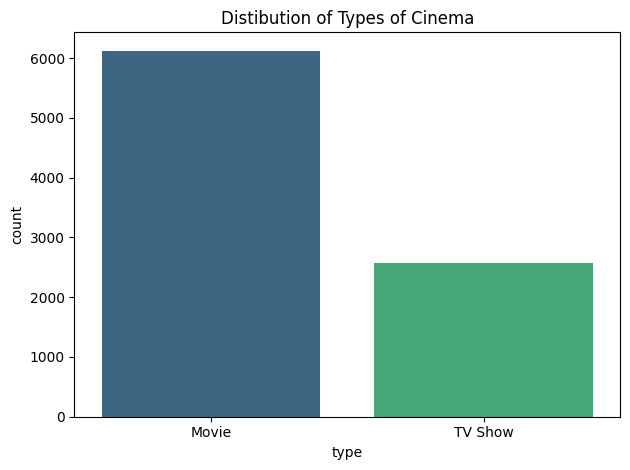

In [21]:
sns.countplot(data = df, x = 'type' , hue = 'type', palette='viridis')
plt.title('Distibution of Types of Cinema')
plt.tight_layout()

C:\Users\anshu\AppData\Local\Temp\ipykernel_9680\2507548705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['rating'], palette='viridis', order = df['rating'].value_counts().index)


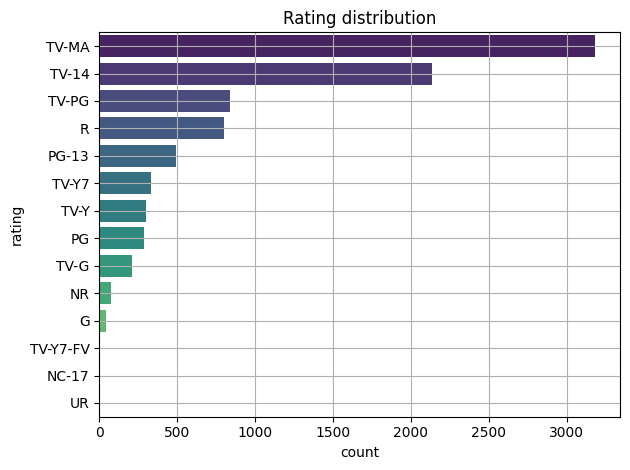

In [22]:

plt.title('Rating distribution')
sns.countplot(df['rating'], palette='viridis', order = df['rating'].value_counts().index)
plt.grid(True)
plt.tight_layout()

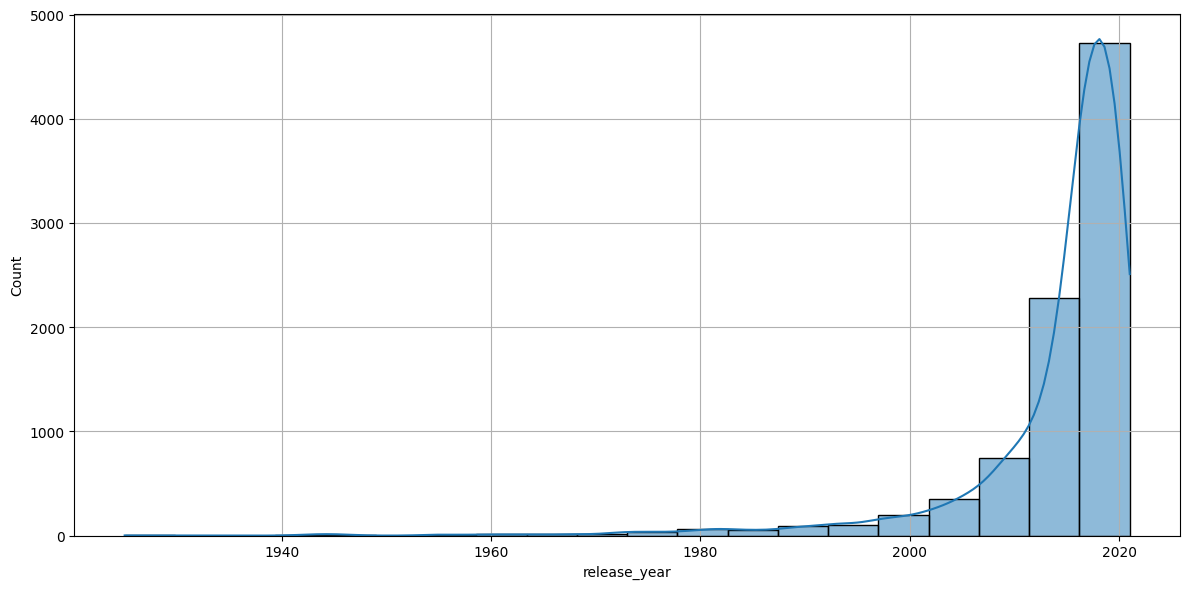

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins = 20, kde = True)
plt.grid(True)
plt.tight_layout()


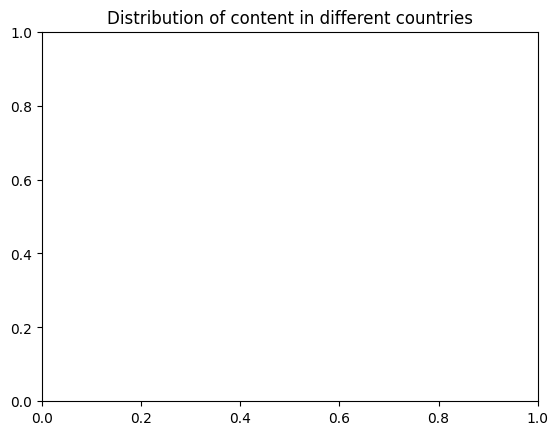

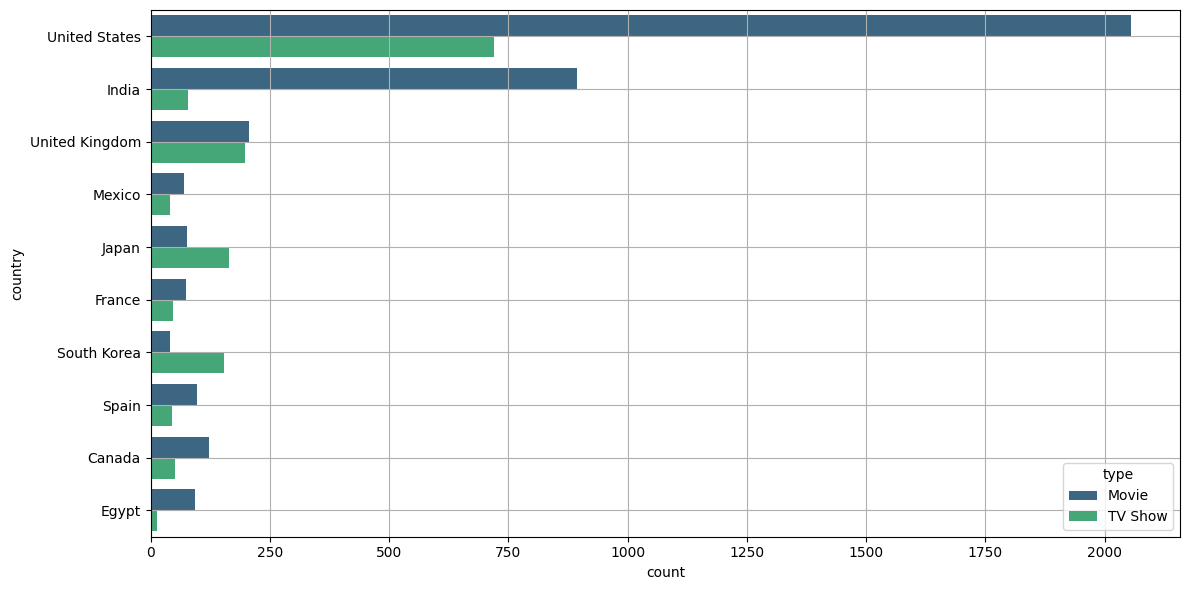

In [24]:
# Understanding what content is available in different countries

top10_countries = df['country'].value_counts().nlargest(10).index
filtered_df = df[df['country'].isin(top10_countries)]

plt.title('Distribution of content in different countries')
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, y = 'country', hue = 'type', palette='viridis')
plt.grid(True)
plt.tight_layout()

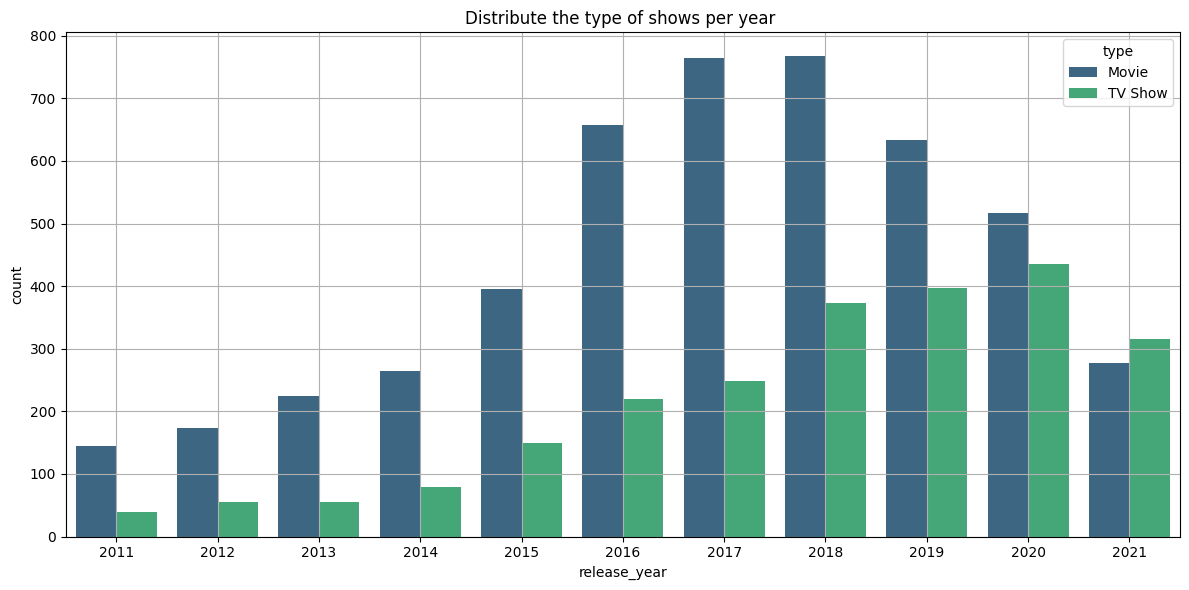

In [25]:
# Does Netflix has more focus on TV Shows than movies in recent years.
plt.figure(figsize=(12,6))
plt.title('Distribute the type of shows per year ')
recent_yeardf = df[df['release_year']>2010]
sns.countplot(data = recent_yeardf, x = 'release_year', hue = 'type', palette='viridis')
plt.grid(True)
plt.tight_layout()

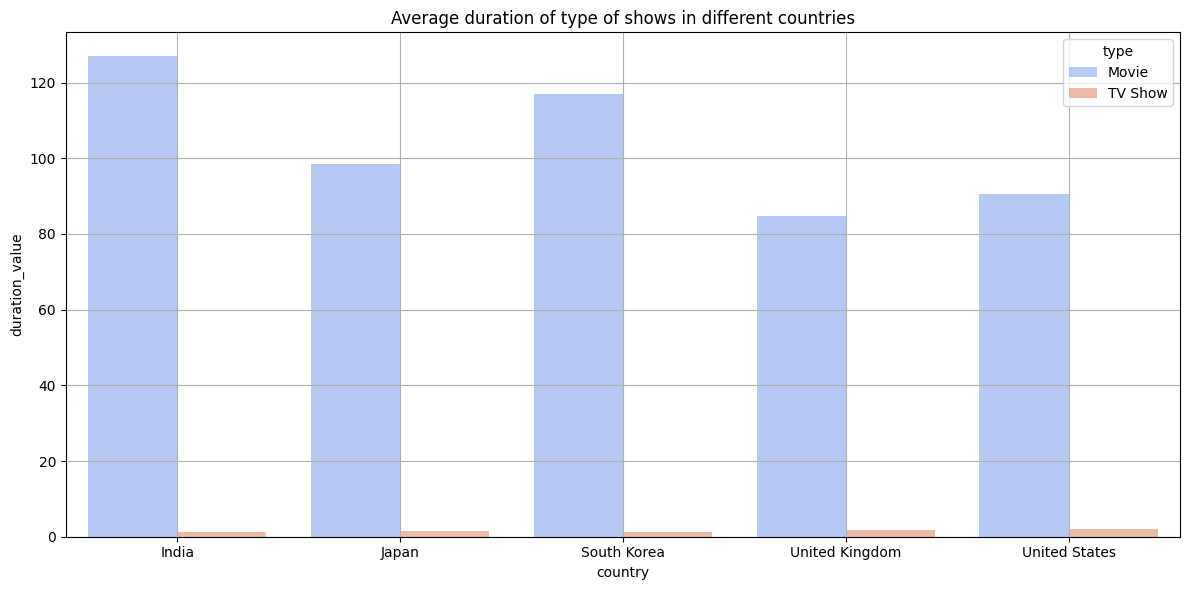

In [26]:

plt.figure(figsize=(12,6))
avgDuration_byCountries = df.groupby(['country', 'type'])['duration_value'].mean().reset_index()
top5_countries = df['country'].value_counts().nlargest(5).index
filtered_avgDurationdf = avgDuration_byCountries[avgDuration_byCountries['country'].isin(top5_countries)]

plt.title('Average duration of type of shows in different countries')
sns.barplot(data=filtered_avgDurationdf, x = 'country', y = 'duration_value', hue = 'type', palette = 'coolwarm')
plt.grid(True)
plt.tight_layout()